In [1]:
import sys
sys.executable

'/anaconda3/bin/python'

In [2]:
# make sure you have installed correctly using this check:
import Bio
print(Bio.__version__)

1.74


In [2]:
# Create a sequence as a string
from Bio.Seq import Seq
my_seq = Seq("AGTACACTGGT")
print(my_seq)
print(type(my_seq))
str_seq = "AGTACACTGGT"
print(type(str_seq))

AGTACACTGGT
<class 'Bio.Seq.Seq'>
<class 'str'>


In [4]:
# reading in fasta files
from Bio import SeqIO
example_dna = SeqIO.parse("ls_orchid.fasta.rtf", "fasta")
for seq_record in example_dna:
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
    print(seq_record.seq.complement())
    

gi|2765657|emb|Z78532.1|CCZ78532
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...C\\', SingleLetterAlphabet())
765
GCATTGTTCCAAAGGCATCCACTTGGACGCCTTCCTAGTAACAACTCTGTTGTCTTATATACTAGCTCAC\TTAGACCTCCTGGACACCATTGAGTCGAGCAGCACCGTGACGAAAACAGCACTGGGACGAAACAACAACC\CGGAGGAGTTCTCGAAAGTACCGTCCAAACTTGAAATCATGCCACGTCAAACGCGGTTCAGTATATTTCG\TAGTGACTACTTACTGTAATAACAGTCTTTTTTAGTCTCCCCGTCATACGATGACTCGTACGGTCACTTA\AAAATACTGAGAGCGTTGCCTATAGAACCGAGATTGTAGCTACTTCTTGCGTCGATTTACGCTATTCACC\ACACTTAACGTCTTAGGGCACTTGGTAGCTCAGAAACTTGCGTTCAACGCGAGCTCCGGTAGTCCGATTC\CCGTGCGGACGGACCCGCAGCACACAACGCAGAGAGGATGGTTACGAACGAACCGTATAGCGATTCGACC\GTAATATGCCTACACTTACTAACCGGGGAACACGGATCCACGCCACCCAGATTCCTAACAACGAAACTAC\CCATCCTTACACCGTGCTCCACCTCTTACGATTGTCAGTATTCCGACGATAAACTTAGGGGGTACAACAA\CATAAAAAAGCTTGGATGTGTTCTTGGATTAACTTGGGGTTACCTCGATTTTATTGGTAACCCGTCAACT\AAAGGTAAGTCTACGCTGGGGTCCAGTCCGCCCCGGTGGGCGACTCAACTCCG\\
gi|2765656|emb|Z78531.1|CFZ78531
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...A\\', Sing

In [5]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC

coding_dna = Seq("TGCATTGGGTGCTGA",IUPAC.unambiguous_dna)
template_dna = coding_dna.reverse_complement()
messenger_rna = coding_dna.transcribe()

print("Coding:       ",coding_dna)
print("Template:     ",template_dna)
print("Messenger RNA:",messenger_rna)
print("Translation:  ",messenger_rna.translate())

Coding:        TGCATTGGGTGCTGA
Template:      TCAGCACCCAATGCA
Messenger RNA: UGCAUUGGGUGCUGA
Translation:   CIGC*


In [4]:
from Bio import SeqIO
example_dna = SeqIO.parse("sequence.fasta", "fasta")
print(example_dna)

<generator object parse at 0x10bc75f48>


In [6]:
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML

sequence = "ACTATTCCAAACAGCTCATAACCAGAAA"
handle = NCBIWWW.qblast("blastn", "nt", sequence)

result = handle.read()
print(result)# Output is in XML format

<?xml version="1.0"?>
<!DOCTYPE BlastOutput PUBLIC "-//NCBI//NCBI BlastOutput/EN" "http://www.ncbi.nlm.nih.gov/dtd/NCBI_BlastOutput.dtd">
<BlastOutput>
  <BlastOutput_program>blastn</BlastOutput_program>
  <BlastOutput_version>BLASTN 2.9.0+</BlastOutput_version>
  <BlastOutput_reference>Stephen F. Altschul, Thomas L. Madden, Alejandro A. Sch&amp;auml;ffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J. Lipman (1997), &quot;Gapped BLAST and PSI-BLAST: a new generation of protein database search programs&quot;, Nucleic Acids Res. 25:3389-3402.</BlastOutput_reference>
  <BlastOutput_db>nt</BlastOutput_db>
  <BlastOutput_query-ID>Query_78045</BlastOutput_query-ID>
  <BlastOutput_query-def>No definition line</BlastOutput_query-def>
  <BlastOutput_query-len>28</BlastOutput_query-len>
  <BlastOutput_param>
    <Parameters>
      <Parameters_expect>10</Parameters_expect>
      <Parameters_sc-match>2</Parameters_sc-match>
      <Parameters_sc-mismatch>-3</Parameters_sc-mismatch>
      <P

To makes sense of this XML document we need to use NCBIXML.parse

In [8]:
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
sequence = "ACTATTCCAAACAGCTCATAACCAGAAA"
handle = NCBIWWW.qblast("blastn", "nt", sequence)
records = NCBIXML.parse(handle)

In [11]:
print(type(records))
record = next(records)
print(type(record))

<class 'generator'>
<class 'Bio.Blast.Record.Blast'>


traverse through the alignments in the BLAST record
Each iteration stores a member containing:
    - descriptions A list of Description objects. 
    - alignments A list of Alignment objects. 
    - multiple_alignment A MultipleAlignment object. 
    + members inherited from base classes

In [12]:
# lets print some summary info and preview all of the alignments in this record
for alignment in record.alignments:
    for hsp in alignment.hsps:
        print('sequence:', alignment.title)
        print('length:', alignment.length)
        print('e value:', hsp.expect)
        print(hsp.query[0:75] + '...')
        print(hsp.match[0:75] + '...')
        print(hsp.sbjct[0:75] + '...')

sequence: gi|1243416810|gb|CP023335.1| Drosophila melanogaster strain rover (forR) chromosome X
length: 22422823
e value: 0.000165194
ACTATTCCAAACAGCTCATAACCAGAAA...
||||||||||||||||||||||||||||...
ACTATTCCAAACAGCTCATAACCAGAAA...
sequence: gi|1243416743|gb|CP023329.1| Drosophila melanogaster strain sitter (fors) chromosome X
length: 22422435
e value: 0.000165194
ACTATTCCAAACAGCTCATAACCAGAAA...
||||||||||||||||||||||||||||...
ACTATTCCAAACAGCTCATAACCAGAAA...
sequence: gi|667695275|gb|AE014298.5| Drosophila melanogaster chromosome X
length: 23542271
e value: 0.000165194
ACTATTCCAAACAGCTCATAACCAGAAA...
||||||||||||||||||||||||||||...
ACTATTCCAAACAGCTCATAACCAGAAA...
sequence: gi|21538995|gb|AC105774.8| Drosophila melanogaster X BAC RP98-8O5 (Roswell Park Cancer Institute Drosophila BAC Library) complete sequence
length: 170186
e value: 0.000165194
ACTATTCCAAACAGCTCATAACCAGAAA...
||||||||||||||||||||||||||||...
ACTATTCCAAACAGCTCATAACCAGAAA...
sequence: gi|3392907|emb|AL009147.1| Drosophila m

In [8]:
# Try it: (I'll use the same record from above) 
# then output the top 3 hits...
count = 0
for alignment in record.alignments:
    for hsp in alignment.hsps:
        count += 1
        if count > 3:
            break
        print('\nsequence:', alignment.title)
        print('length:', alignment.length)
        print(hsp.query[0:75] + '...')
        print(hsp.match[0:75] + '...')
        print(hsp.sbjct[0:75] + '...')



sequence: gi|1243416810|gb|CP023335.1| Drosophila melanogaster strain rover (forR) chromosome X
length: 22422823
ACTATTCCAAACAGCTCATAACCAGAAA...
||||||||||||||||||||||||||||...
ACTATTCCAAACAGCTCATAACCAGAAA...

sequence: gi|1243416743|gb|CP023329.1| Drosophila melanogaster strain sitter (fors) chromosome X
length: 22422435
ACTATTCCAAACAGCTCATAACCAGAAA...
||||||||||||||||||||||||||||...
ACTATTCCAAACAGCTCATAACCAGAAA...

sequence: gi|667695275|gb|AE014298.5| Drosophila melanogaster chromosome X
length: 23542271
ACTATTCCAAACAGCTCATAACCAGAAA...
||||||||||||||||||||||||||||...
ACTATTCCAAACAGCTCATAACCAGAAA...


# Charts

## pyplot

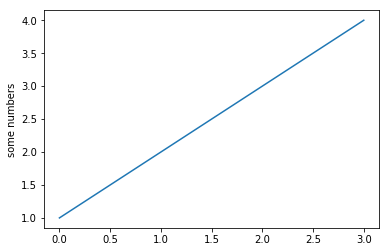

In [18]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

In [14]:
# a short intro to numpy arrays:
# source: http://cs231n.github.io/python-numpy-tutorial/
import numpy as np

a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


In [15]:
# another numpy example:
# source: https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)
t

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])

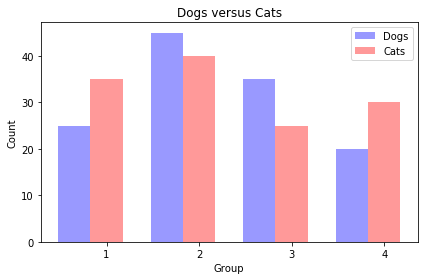

In [1]:
# Next line puts charts inline in jupyter
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

# Data sset
data1 = [25,45,35,20]
data2 = [35,40,25,30]
index = np.arange(len(data1))
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}

# Creates two bars
rects1 = plt.bar(index, data1, bar_width, alpha=opacity,
                 color='b', label='Dogs')
rects2 = plt.bar(index + bar_width, data2, bar_width,
                 alpha=opacity, color='r', label='Cats')

plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Dogs versus Cats')
plt.xticks(index + bar_width, ('1', '2', '3', '4'))
plt.legend()
plt.tight_layout()
plt.show()


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

num_bins = 5
x = [5, 3, 8, 5, 2, 7, 2, 4, 6, 2]
n, bins, patches = plt.hist(x, num_bins, 
          density=False, facecolor='blue',
          alpha=0.5)

plt.xlabel('Number')
plt.ylabel('Count')
plt.title('Histogram')
plt.show()

ImportError: cannot import name 'get_backend'

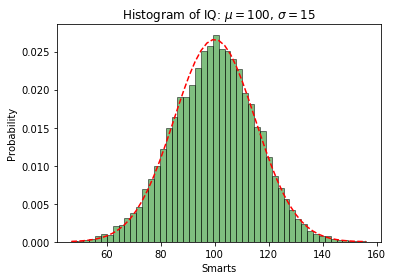

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

mu = 100
sigma = 15

# generates data from normal distribution
x = mu+sigma*np.random.randn(10000)
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, edgecolor="k",
                            density=1, facecolor='green',
                            alpha=0.5)
y = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')
plt.subplots_adjust(left=0.15)
plt.show()

[0 1 2 3 4]


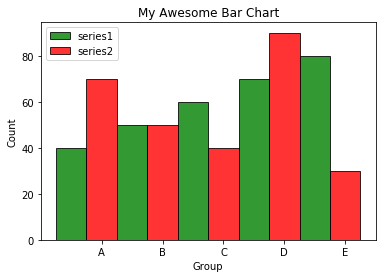

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

series1 = [40, 50, 60, 70, 80]
series2 = [70, 50, 40, 90, 30]
index = np.arange(len(series1))
print(index)

# since index is 1 unit apart, to get no space between
# bars we need a bar width of 0.5
bar_width = 0.5
opacity = 0.8
error_config = {'ecolor': '0.5'}
rects1 = plt.bar(index, series1, bar_width, alpha=opacity,
                 color='g', edgecolor="k",label='series1')
rects2 = plt.bar(index + bar_width, series2, bar_width,alpha=opacity, 
                 color='r', edgecolor="k", label='series2')

plt.xlabel('Group')
plt.ylabel('Count')
plt.title('My Awesome Bar Chart')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D', 'E'))
plt.legend()
plt.show()

Predicted y-values: [10.85714286 15.11428571 19.37142857 23.62857143 27.88571429 32.14285714]
Prediction error: [ 0.14285714 -1.11428571  0.62857143  0.37142857  1.11428571 -1.14285714]
Residual error: 1.041976144503454


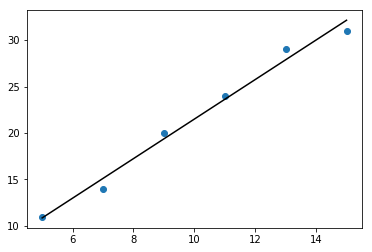

In [26]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
x = np.array([5, 7, 9, 11, 13, 15])
y = np.array([11, 14, 20, 24, 29, 31])
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)
predict_y = intercept + slope * x
print("Predicted y-values:",predict_y)
pred_error = y - predict_y
print("Prediction error:",pred_error)
degr_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degr_freedom)
print("Residual error:",residual_std_error)
plt.plot(x, y, 'o')
plt.plot(x, predict_y, 'k-')
plt.show()


In [33]:
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

## alt data generation:
#import random as rnd
#data = []
#for i in range(0,100):
#    data.append([rnd.random(), rnd.random()])

# data generation
data = vstack((rand(150,2) + array([.5,.5]),rand(150,2)))

##alternative way of coding
#km =kmeans(data,2)
#centroids = km[0]

# computing K-Means with K = 2 (2 clusters)
numclusters = 2
centroids,_ = kmeans(data,numclusters)
# assign each sample to a cluster
idx,_ = vq(data,centroids)


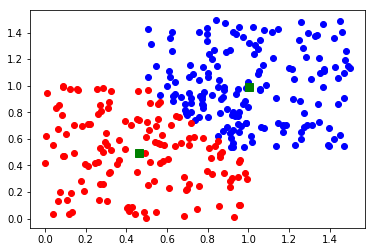

In [34]:
# Move data into individual lists based on clustering
clusters = []
for i in range(0, numclusters):
    clusters.append([[],[]])

for i in range(0,len(idx)):
    clusterIdx = idx[i]
    clusters[clusterIdx][0].append(data[i][0])
    clusters[clusterIdx][1].append(data[i][1])

# Plot data points and cluster centroids
plt.plot(clusters[0][0],clusters[0][1],'ob',
         clusters[1][0],clusters[1][1],'or')
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
plt.show()

[-1, -13, -28, -43, -58, -73]
Formula: -3.0500000000000003 * x + 3.299999999999997 = y
Predicted y-values: [  0.25 -11.95 -27.2  -42.45 -57.7  -72.95]
Prediction error: [-1.25 -0.05  1.2   2.45 -2.3  -0.05]
Residual error: 1.8907670401189043


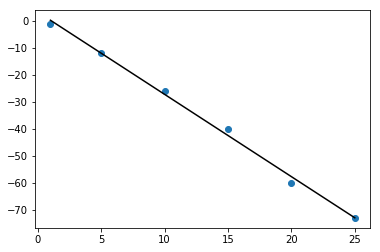

In [36]:
# Data generator:
x = [1, 5, 10, 15, 20, 25]
y = [x * -3 + 2 for x in x]
print(y)

# Answer:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 5, 10, 15, 20, 25])
y = np.array([-1, -12, -26, -40, -60, -73])

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

print("Formula:", slope,"* x +",intercept,"= y")
predict_y = intercept + slope * x
print("Predicted y-values:",predict_y)
pred_error = y - predict_y
print("Prediction error:",pred_error)
degr_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degr_freedom)
print("Residual error:",residual_std_error)
plt.plot(x, y, 'o')
plt.plot(x, predict_y, 'k-')
plt.show()


# Conecting to Databases (MySQL) with Python 

In [15]:
import mysql.connector
try:
    cnx=mysql.connector.connect(user='data301', password='ubc',host='cosc304.ok.ubc.ca',database='WorksOn')
    cursor = cnx.cursor()
    query = ("SELECT * FROM emp")
    cursor.execute(query)
    myresult = cursor.fetchall()
    for x in myresult:
        print(x)
    cursor.close()
except mysql.connector.Error as err:
    print(err)
finally:
    cnx.close()


('E1', 'J. Doe', datetime.date(1975, 1, 5), 'EE', Decimal('30000.00'), 'E2', None)
('E2', 'M. Smith', datetime.date(1966, 6, 4), 'SA', Decimal('50000.00'), 'E5', 'D3')
('E3', 'A. Lee', datetime.date(1966, 7, 5), 'ME', Decimal('40000.00'), 'E7', 'D2')
('E4', 'J. Miller', datetime.date(1950, 9, 1), 'PR', Decimal('20000.00'), 'E6', 'D3')
('E5', 'B. Casey', datetime.date(1971, 12, 25), 'SA', Decimal('50000.00'), 'E8', 'D3')
('E6', 'L. Chu', datetime.date(1965, 11, 30), 'EE', Decimal('30000.00'), 'E7', 'D2')
('E7', 'R. Davis', datetime.date(1977, 9, 8), 'ME', Decimal('40000.00'), 'E8', 'D1')
('E8', 'J. Jones', datetime.date(1972, 10, 11), 'SA', Decimal('50000.00'), None, 'D1')


In [14]:
import mysql.connector
try:
    cnx=mysql.connector.connect(user='data301', password='ubc',host='cosc304.ok.ubc.ca',database='WorksOn')
    cursor = cnx.cursor()
    query = ("SELECT title, AVG(salary) as avgSalary FROM emp WHERE ename >= 'J' GROUP BY title")
    cursor.execute(query)
    for (title, avgSalary) in cursor:
        print(title, avgSalary)
    cursor.close()
except mysql.connector.Error as err:
    print(err)
finally:
    cnx.close()

    

EE 30000.000000
ME 40000.000000
PR 20000.000000
SA 50000.000000


# Map Reduce

In [16]:
import functools     # For Reduce

data = [1, 2, 3, 4, 5, 6]

def triple(x):  # function to be used with map
    return x*3

def myfilter(x): # function to be used with filter
    if x % 2 == 0:
        return True
    return False

def sum(x, y):      # function to be used with reduce
    return x+y


## map

In [17]:
result = list(map(triple, data))
print("Result after map:",result)


Result after map: [3, 6, 9, 12, 15, 18]


In [20]:
# alternatively using for loops:
items = [1, 2, 3, 4, 5, 6]
output = []
for i in items:
    val = triple(i)
    output.append(val)
    
print(output)

[3, 6, 9, 12, 15, 18]


## filter

In [18]:
result = list(filter(myfilter, result))
print("Result after filter:",result)

Result after filter: [6, 12, 18]


In [22]:
# Alternative using for loops
items = [3, 6, 9, 12, 15, 18]
output = []
for i in items:
    val = myfilter(i)
    if val:
        output.append(i)
    
print(output)

[6, 12, 18]


## reduce

In [19]:
result = functools.reduce(sum, result)
print("Result after reduce:",result)

Result after reduce: 36


In [24]:
# Alternative using a for loop:
items = [6, 12, 18]
val = items[0]
item2 = items[1:]
for a in item2:
    val = sum(val,a)
    
print(val)

36


## Try It!

Write a map-reduce program that:
    - during the map step will subtract 2 from each element. 
    - The reduce step should return the product of all the elements in the list

In [25]:
import functools     # For Reduce

data = [4, 5, 3, 4, 5, 6]

# Map function
def subtract(x):
    return x-2

# Reduce function
def prod(x, y):
    return x*y

result = list(map(subtract, data))
print("Result after map:",result)

result = functools.reduce(prod, result)
print("Result after reduce:",result)


Result after map: [2, 3, 1, 2, 3, 4]
Result after reduce: 144
